In [ ]:
!pip install transformers
!pip install timm
# printing image
# https://huggingface.co/docs/transformers/en/tasks/object_detection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.6 MB/s eta 0:00:00


In [ ]:
import json
with open('/content/sherlock_val_with_split_idxs_v1.json','r') as f_in:
  obj = json.load(f_in)

In [ ]:
print(len(obj))

23535


In [ ]:
print(obj[0])

{'inputs': {'image': {'url': 'https://cs.stanford.edu/people/rak248/VG_100K_2/2378438.jpg', 'width': 500, 'height': 375}, 'bboxes': [{'height': 168, 'width': 89, 'left': 329, 'top': 119}], 'clue': 'fruit cut in half', 'confidence': 2.0, 'obs_idx': 1}, 'targets': {'inference': 'people going to eat it'}, 'instance_id': 'c344c9b7dbee3d5d5dfcfc66c245b737', 'split_idx': 0}


In [ ]:
print(obj[0].keys())

dict_keys(['inputs', 'targets', 'instance_id', 'split_idx'])


In [ ]:
img_hash = {}

for o in obj:
  img = o['inputs']['image']['url']
  if img in img_hash:
    img_hash[img].append(o)
  else:
    img_hash[img] = [o]

In [ ]:
print(len(img_hash.keys()))

6961


In [ ]:
for obj in img_hash:
  print(obj)
  print(img_hash[obj])
  break

https://cs.stanford.edu/people/rak248/VG_100K_2/2378438.jpg
[{'inputs': {'image': {'url': 'https://cs.stanford.edu/people/rak248/VG_100K_2/2378438.jpg', 'width': 500, 'height': 375}, 'bboxes': [{'height': 168, 'width': 89, 'left': 329, 'top': 119}], 'clue': 'fruit cut in half', 'confidence': 2.0, 'obs_idx': 1}, 'targets': {'inference': 'people going to eat it'}, 'instance_id': 'c344c9b7dbee3d5d5dfcfc66c245b737', 'split_idx': 0}, {'inputs': {'image': {'url': 'https://cs.stanford.edu/people/rak248/VG_100K_2/2378438.jpg', 'width': 500, 'height': 375}, 'bboxes': [{'height': 42, 'width': 84, 'left': 240, 'top': 112}], 'clue': 'knife is dirty', 'confidence': 3.0, 'obs_idx': 0}, 'targets': {'inference': 'it was used to cut the fruit in half'}, 'instance_id': '64f5e6587d2078fbfe27d8e34442f4e6', 'split_idx': 7}, {'inputs': {'image': {'url': 'https://cs.stanford.edu/people/rak248/VG_100K_2/2378438.jpg', 'width': 500, 'height': 375}, 'bboxes': [{'height': 44, 'width': 202, 'left': 284, 'top': 57}

In [ ]:
img_hash[obj][0]['inputs']

{'image': {'url': 'https://cs.stanford.edu/people/rak248/VG_100K_2/2378438.jpg',
  'width': 500,
  'height': 375},
 'bboxes': [{'height': 168, 'width': 89, 'left': 329, 'top': 119}],
 'clue': 'fruit cut in half',
 'confidence': 2.0,
 'obs_idx': 1}

In [ ]:
img_hash.keys()

dict_keys(['https://cs.stanford.edu/people/rak248/VG_100K_2/2378438.jpg', 'http://s3-us-west-2.amazonaws.com/ai2-rowanz/vcr1images/movieclips_What_to_Expect_When_Youre_Expecting/yNkcLZ0BPuc@32.jpg', 'https://cs.stanford.edu/people/rak248/VG_100K/2371570.jpg', 'http://s3-us-west-2.amazonaws.com/ai2-rowanz/vcr1images/movieclips_I_Now_Pronounce_You_Chuck__Larry/K-cBT5AxRrg@0.jpg', 'https://cs.stanford.edu/people/rak248/VG_100K/2332834.jpg', 'http://s3-us-west-2.amazonaws.com/ai2-rowanz/vcr1images/lsmdc_3088_WHATS_YOUR_NUMBER/3088_WHATS_YOUR_NUMBER_00.19.00.802-00.19.04.198@0.jpg', 'http://s3-us-west-2.amazonaws.com/ai2-rowanz/vcr1images/movieclips_Firewalker/Tv6tdiEMGaY@38.jpg', 'http://s3-us-west-2.amazonaws.com/ai2-rowanz/vcr1images/lsmdc_3088_WHATS_YOUR_NUMBER/3088_WHATS_YOUR_NUMBER_00.43.06.431-00.43.35.488@3.jpg', 'https://cs.stanford.edu/people/rak248/VG_100K_2/3218.jpg', 'http://s3-us-west-2.amazonaws.com/ai2-rowanz/vcr1images/lsmdc_3088_WHATS_YOUR_NUMBER/3088_WHATS_YOUR_NUMBER_01.

In [ ]:
img_hash[obj][0]['targets']['inference']

'people going to eat it'

In [ ]:
#idx:1 food but many people

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initiali

https://cs.stanford.edu/people/rak248/VG_100K_2/2395741.jpg
clue:0 a ow standing in middle of street; inference:0 this cow is domesticated
clue:1 umbrellas open by the people; inference:1 the people want to protect themselves from the sun
clue:2 garbage strewn all over street; inference:2 the garbage has not come to pick up the garbage


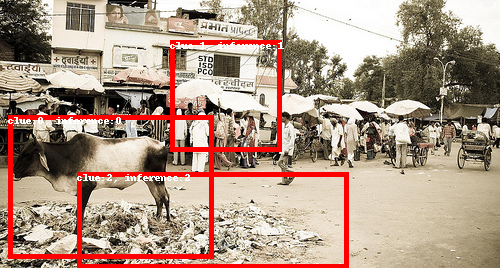

In [ ]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import torch
import urllib
import time
import numpy as np
import os
from PIL import Image, ImageDraw,ImageFont
import urllib

device = 'cuda'
image_processor = AutoImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = AutoModelForObjectDetection.from_pretrained("facebook/detr-resnet-50").to(device)

# font_family = "arial.ttf"
# font = ImageFont.truetype(20)
url = list(img_hash.keys())[5]
print(url)

urllib.request.urlretrieve(
  url,
   "temp.png")
input = img_hash[url]

### SHERLOCK CLUES DISPLAY
img = Image.open("temp.png")
draw = ImageDraw.Draw(img)

boxes1 = []
boxes1_label = []

for i in range(len(input)):
  clue = input[i]['inputs']['clue']
  bboxes = input[i]['inputs']['bboxes']
  for bbox in bboxes:
    x, y, h, w = bbox['left'],bbox['top'],bbox['height'],bbox['width']
    str_display = f"clue:{i}, inference:{i}"
    draw.rectangle((x, y, x + w, y + h), outline="red", width=5)
    draw.text((x, y), str_display, fill="white")

    boxes1.append([x,y,x+w,y+h])
    boxes1_label.append(clue)

for i in range(len(input)):
  clue = input[i]['inputs']['clue']
  inference = input[i]['targets']['inference']
  print(f'clue:{i} {clue}; inference:{i} {inference}')

img

tensor(165.7291, device='cuda:0') tensor(79.5179, device='cuda:0') tensor(225.8248, device='cuda:0') tensor(104.9092, device='cuda:0') umbrella
tensor(229.9575, device='cuda:0') tensor(110.0180, device='cuda:0') tensor(246.7099, device='cuda:0') tensor(165.8636, device='cuda:0') person
tensor(391.7722, device='cuda:0') tensor(116.1136, device='cuda:0') tensor(413.2336, device='cuda:0') tensor(170.7890, device='cuda:0') person
tensor(387.2586, device='cuda:0') tensor(121.5727, device='cuda:0') tensor(401.6752, device='cuda:0') tensor(165.9569, device='cuda:0') person
tensor(42.4772, device='cuda:0') tensor(69.4961, device='cuda:0') tensor(104.0498, device='cuda:0') tensor(94.4290, device='cuda:0') umbrella
tensor(363.4032, device='cuda:0') tensor(117.9873, device='cuda:0') tensor(382.0379, device='cuda:0') tensor(161.0640, device='cuda:0') person
tensor(476.0787, device='cuda:0') tensor(117.8948, device='cuda:0') tensor(491.0684, device='cuda:0') tensor(140.2406, device='cuda:0') person

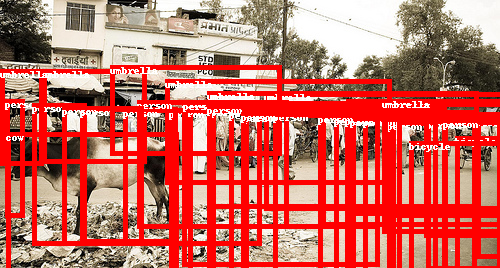

In [ ]:
### OBJECT DETECTION OUPTUT
img = Image.open("temp.png")
draw = ImageDraw.Draw(img)

boxes2 = []
boxes2_label = []

with torch.no_grad():
    inputs = image_processor(images=img, return_tensors="pt").to(device)
    outputs = model(**inputs)
    target_sizes = torch.tensor([img.size[::-1]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    x, y, w, h = tuple(box)
    # Check if coordinates are normalized or not
    if max(box) > 1.0:
        # Coordinates are un-normalized, no need to re-scale them
        x1, y1 = int(x), int(y)
        x2, y2 = int(x + w), int(y + h)
    else:
        # Coordinates are normalized, re-scale them
        x1 = int(x * width)
        y1 = int(y * height)
        x2 = int((x + w) * width)
        y2 = int((y + h) * height)
    draw.rectangle((x, y, x + w, y + h), outline="red", width=5)
    draw.text((x, y), model.config.id2label[label.item()], fill="white")
    print(x,y,w,h,model.config.id2label[label.item()])
    boxes2.append([x,y,x+w,y+h])
    boxes2_label.append(model.config.id2label[label.item()])

img

# Computing IoU between the detected and inference bounding boxes

In [ ]:
from tqdm import tqdm

bbox_hash = {}
for obj in tqdm(img_hash):

  input = img_hash[obj]
  url = input[0]['inputs']['image']['url']

  urllib.request.urlretrieve(
    url,
    "temp.png")

  ### SHERLOCK CLUES DISPLAY
  img = Image.open("temp.png")

  boxes1 = []
  boxes1_label = []

  for i in range(len(input)):
    clue = input[i]['inputs']['clue']
    bboxes = input[i]['inputs']['bboxes']
    inference = input[i]['targets']['inference']
    for bbox in bboxes:
      x, y, h, w = bbox['left'],bbox['top'],bbox['height'],bbox['width']
      str_display = f"clue:{i} ## inference:{i}"

      boxes1.append([x,y,x+w,y+h])
      boxes1_label.append(f'{clue},{inference}')

  bbox_hash[obj] = {}
  bbox_hash[obj]['boxes1'] = (boxes1,boxes1_label)

  img = Image.open("temp.png")

  boxes2 = []
  boxes2_label = []

  try:
    with torch.no_grad():
        inputs = image_processor(images=img, return_tensors="pt").to(device)
        outputs = model(**inputs)
        target_sizes = torch.tensor([img.size[::-1]])
        results = image_processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        x, y, w, h = tuple(box)
        # Check if coordinates are normalized or not
        if max(box) > 1.0:
            # Coordinates are un-normalized, no need to re-scale them
            x1, y1 = int(x), int(y)
            x2, y2 = int(x + w), int(y + h)
        else:
            # Coordinates are normalized, re-scale them
            x1 = int(x * width)
            y1 = int(y * height)
            x2 = int((x + w) * width)
            y2 = int((y + h) * height)

        boxes2.append([x.item(),y.item(),x.item()+w.item(),y.item()+h.item()])
        boxes2_label.append(model.config.id2label[label.item()])
  except:
    continue
    print('error')

  bbox_hash[obj]['boxes2'] = (boxes2,boxes2_label)

100%|██████████| 6961/6961 [1:25:40<00:00,  1.35it/s]


In [ ]:
# 1.Areas of bounding box relative to the whole img - the clues seen by humans might be specific
# 2.Object analysis of images (similar to LDA)
# 3.Current localization like object detection algorithms cannot capture concepts of this kind
# Hence IOU is low

In [ ]:
with open('/content/drive/MyDrive/MMML_11-777/Report1/bboxes_comparison.json','w') as f_out:
  json.dump(bbox_hash,f_out)

In [ ]:
# testing below

In [ ]:
import json
with open('/content/drive/MyDrive/MMML_11-777/Report1/bboxes_comparison.json','r') as f_in:
  obj_read = json.load(f_in)

In [ ]:
obj_read[list(obj_read.keys())[-97]]

{'boxes1': [[[0, 0, 866, 559], [781, 198, 1493, 789], [271, 81, 1187, 803]],
  ['a man wearing a sweater,it is cold',
   'a woman wearing a necklace,she wants to look pretty',
   'an old woman looking in a mirror,she just got surgery']],
 'boxes2': [[[1360.60546875,
    2.1361827850341797,
    3278.86572265625,
    809.6551036834717],
   [254.2960968017578,
    464.25518798828125,
    969.2743072509766,
    1243.1376342773438],
   [357.758056640625,
    0.6217467784881592,
    1931.07666015625,
    809.3549621105194]],
  ['person', 'cell phone', 'person']]}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torchvision

In [ ]:
obj_read[url_key]['boxes1'][0]

[[133, 17, 235, 194], [24, 55, 341, 217], [309, 65, 500, 305]]

In [ ]:
obj_read[url_key]['boxes2'][0]

[[165.10614013671875,
  34.549129486083984,
  379.99476623535156,
  117.06958389282227],
 [471.0654602050781, 116.0224609375, 971.1162414550781, 250.95059204101562],
 [479.4274597167969, 119.77803802490234, 979.4577331542969, 258.2562789916992],
 [1.4307498931884766, 63.89725112915039, 388.671350479126, 367.12302017211914],
 [436.0670471191406, 198.1892852783203, 879.5180358886719, 403.38685607910156],
 [387.49517822265625, 98.60018157958984, 853.6926879882812, 386.1621627807617]]

In [ ]:
ious_all = []
err_c = 0

for url_key in obj_read:
  try:
    boxes1 = torch.tensor(obj_read[url_key]['boxes1'][0])
    boxes2 = torch.tensor(obj_read[url_key]['boxes2'][0])

    ious = torchvision.ops.box_iou(boxes1, boxes2)
    max_ious = torch.max(ious,dim=1).values
    ious_all.extend(max_ious)

  except:
    err_c += 1
    continue

print(err_c)

72


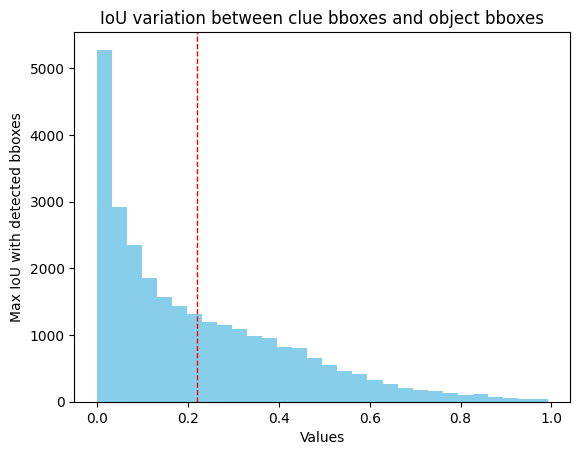

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(ious_all, bins=30, color='skyblue')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Max IoU with detected bboxes')
plt.title('IoU variation between clue bboxes and object bboxes')
plt.axvline(np.mean(ious_all), color='red', linestyle='dashed', linewidth=1)
# Display the plot
plt.show()

# Object wise frequencies detected from DETR on 1000 samples

In [75]:
from collections import Counter

import pandas as pd
df_cnt = pd.read_csv('/content/obj_list.csv')

In [77]:
df_cnt.head()

,Unnamed: 0,obj_list
0,0,chair
1,1,person
2,2,chair
3,3,chair
4,4,wine glass


In [78]:
count = Counter(df_cnt['obj_list'])
print(count)

Counter({'person': 7286, 'chair': 625, 'tie': 510, 'book': 457, 'cat': 434, 'bottle': 416, 'cup': 359, 'cell phone': 334, 'dining table': 325, 'tv': 306, 'car': 291, 'sheep': 285, 'umbrella': 252, 'clock': 229, 'wine glass': 196, 'boat': 194, 'apple': 194, 'bowl': 183, 'potted plant': 174, 'handbag': 159, 'horse': 142, 'sports ball': 140, 'bench': 126, 'orange': 125, 'bed': 123, 'motorcycle': 120, 'donut': 119, 'carrot': 112, 'traffic light': 108, 'broccoli': 106, 'train': 100, 'truck': 100, 'vase': 99, 'suitcase': 94, 'backpack': 93, 'dog': 89, 'bicycle': 87, 'laptop': 87, 'sandwich': 86, 'bird': 80, 'couch': 78, 'knife': 74, 'refrigerator': 72, 'cake': 67, 'spoon': 67, 'tennis racket': 61, 'kite': 60, 'skis': 60, 'oven': 60, 'microwave': 60, 'surfboard': 59, 'skateboard': 58, 'remote': 57, 'bus': 54, 'banana': 52, 'fork': 50, 'cow': 49, 'keyboard': 47, 'baseball glove': 43, 'hot dog': 41, 'baseball bat': 40, 'airplane': 38, 'teddy bear': 37, 'zebra': 37, 'bear': 35, 'pizza': 34, 'toi

In [90]:
filtered_objs = {}
for key in count:
  if count[key] > 200:
    filtered_objs[key] = count[key]

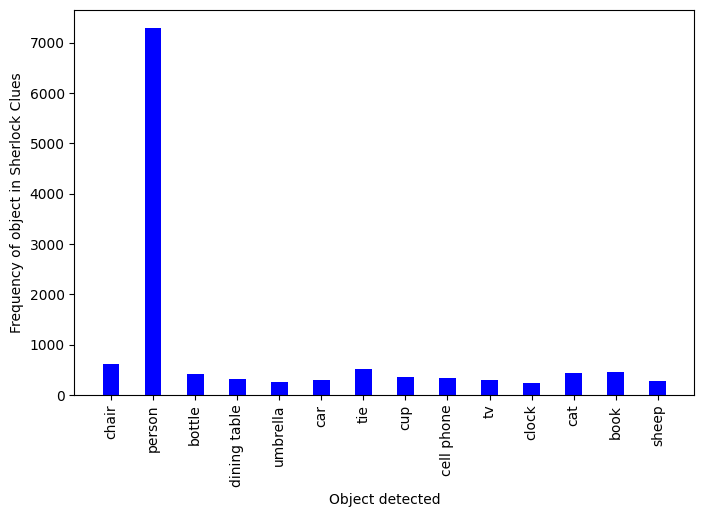

In [91]:

import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = filtered_objs
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (8, 5))

# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)

plt.xlabel("Object detected")
plt.xticks(rotation=90)
plt.ylabel("Frequency of object in Sherlock Clues")
# plt.title("Frequency distribution of objects detected in Sherlock images")
plt.show()

([<matplotlib.patches.Wedge at 0x79da4c3edf90>,
 [Text(1.085570406282684, 0.17758629734089373, 'chair'),
  Text(-0.6602693420993186, 0.8797979290062764, 'person'),
  Text(-0.5269405609058432, -0.9655742567364954, 'bottle'),
  Text(-0.3327454067035175, -1.0484657811858769, 'dining table'),
  Text(-0.17265582655737627, -1.0863654843356307, 'umbrella'),
  Text(-0.018406706126073903, -1.0998459861133232, 'car'),
  Text(0.20891075823365624, -1.0799797660577901, 'tie'),
  Text(0.44505385962326216, -1.0059458544247986, 'cup'),
  Text(0.6177698709318703, -0.9101430582984307, 'cell phone'),
  Text(0.7597031004448691, -0.7955194524173832, 'tv'),
  Text(0.8624620237452504, -0.6827585646458397, 'clock'),
  Text(0.9665977542712209, -0.5250607407127605, 'cat'),
  Text(1.0611835167885966, -0.28963691701194844, 'book'),
  Text(1.0969943471473504, -0.08126132122208211, 'sheep')])

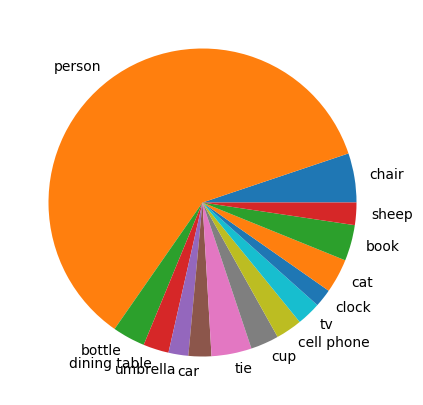

In [93]:
fig = plt.figure(figsize = (10, 5))

plt.pie(values, labels = courses)
